<a href="https://colab.research.google.com/github/lakshaygola/Anomaly-Detection/blob/main/LSTM_On_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('lstm-anomaly-detection')
jovian.set_colab_id('19PiXMHPBSdUugyMwHK95TC81i-sGQGWi')

     |████████████████████████████████| 71kB 6.7MB/s 


In [2]:
!pip install opendatasets

In [3]:
project_name = "lstm-anomaly-detection"

## Apply LSTM model to detect the anomaly in IDS

In [4]:
# Libaries we need in the project
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score 
from sklearn.metrics import classification_report, f1_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier

In [5]:
# Downloading the whole dataset (from kaggle)
datasetLink = 'https://www.kaggle.com/galaxyh/kdd-cup-1999-data'

od.download(datasetLink)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lakshaygola
Your Kaggle Key: ··········


 18%|█▊        | 16.0M/87.8M [00:00<00:00, 167MB/s]

100%|██████████| 87.8M/87.8M [00:00<00:00, 221MB/s]


In [6]:
# Opening the file (This file contain all the feature name)
with open('/content/kdd-cup-1999-data/kddcup.names', 'r') as f:
  print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [7]:
# List of all the feature 
features=['duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'attack_type']

In [8]:
# Reading the 10 percent of the dataset
df = pd.read_csv('/content/kdd-cup-1999-data/kddcup.data_10_percent/kddcup.data_10_percent'
                ,names = features)

In [9]:
sns.set_style('darkgrid')
mlt.rcParams['font.size'] = 14
mlt.rcParams['figure.figsize'] = (10,5)

In [10]:
df.sample(10)

duration protocol_type  ... dst_host_srv_rerror_rate attack_type
273979         0          icmp  ...                      0.0      smurf.
177521         0          icmp  ...                      0.0      smurf.
481748         0           tcp  ...                      0.0     normal.
93237          0          icmp  ...                      0.0      smurf.
383519         0           tcp  ...                      0.0    neptune.
92142          0           udp  ...                      0.0      satan.
388463         0           tcp  ...                      0.0    neptune.
291449         0          icmp  ...                      0.0      smurf.
165027         0          icmp  ...                      0.0      smurf.
370615         0          icmp  ...                      0.0      smurf.

[10 rows x 42 columns]

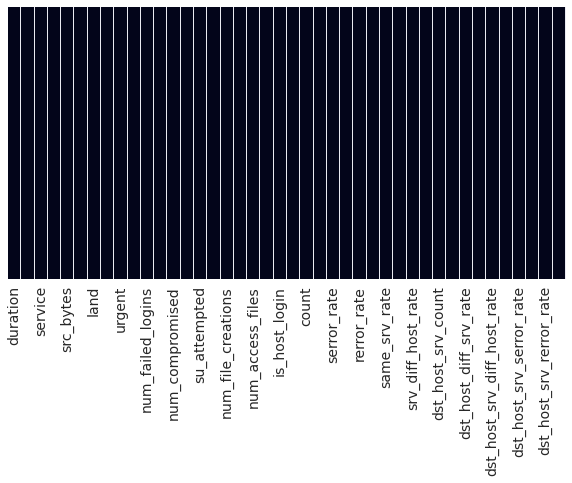

In [11]:
# Checking for the null values
sns.heatmap(df.isnull(), cbar= False, yticklabels= False)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [13]:
# Making a dict to help me to categories the different attack into there classes
attack_category = {'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 
                   'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 
                   'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 
                   'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 
                   'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 
                   'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 
                   'spy': 'r2l', 'teardrop': 'dos', 'warezclient': 'r2l', 
                   'warezmaster': 'r2l', 'normal': 'normal'}

"""r2l - remote to local 
    u2r - user to remote
    dos - Denial-of-Service
    probe - probe
    Normal - No attack"""

'r2l - remote to local \n    u2r - user to remote\n    dos - Denial-of-Service\n    probe - probe\n    Normal - No attack'

In [14]:
# Changing the attack type to its in category
df['attack_type'] = df['attack_type'].apply(lambda x: attack_category[x[:-1]])
df.sample(10)

duration protocol_type  ... dst_host_srv_rerror_rate attack_type
233365         0          icmp  ...                      0.0         dos
452014         0           tcp  ...                      1.0      normal
393837         0           tcp  ...                      0.0         dos
369295         0           tcp  ...                      0.0         dos
388166         0           tcp  ...                      0.0         dos
159547         0          icmp  ...                      0.0         dos
160269         0          icmp  ...                      0.0         dos
235553         0          icmp  ...                      0.0         dos
228938         0          icmp  ...                      0.0         dos
472453         0           tcp  ...                      1.0         dos

[10 rows x 42 columns]

In [16]:
# Converting the protocol_type to the numeric columns 
print(df.protocol_type.unique().tolist())

fig = px.histogram(df, 
      x = 'protocol_type',
      title = 'Different Protocals')
fig.show()

protocol_type_map = {'tcp': 0, 'udp': 1, 'icmp': 2}
df['protocol_type'].replace(protocol_type_map, inplace = True)

['tcp', 'udp', 'icmp']


In [17]:
# Handling the flag column of the dataset
print(df.flag.unique().tolist())

fig = px.histogram(df, 
      x = 'flag',
      title = 'Different flag')
fig.show()

flag_map = {'SF': 0, 'S0': 1, 'REJ': 3, 'RSTR': 4, 'RSTO': 5, 'SH': 6, 'S1': 7, 
            'S2': 8, 'RSTOS0': 9, 'S3': 10, 'OTH': 11}

df['flag'].replace(flag_map, inplace = True)

['SF', 'S1', 'REJ', 'S2', 'S0', 'S3', 'RSTO', 'RSTR', 'RSTOS0', 'OTH', 'SH']


In [19]:
# We will see the importance of the features first
# service_map = {}
# For now i am dropping the columns from the dataset
df.drop('service', axis = 1, inplace = True)

In [20]:
df.shape

(494021, 41)

In [22]:
# Droping of the all the missing values
df.dropna()

# Droping the columns whose unique values are less than 1
df = df[[col for col in df if df[col].nunique() > 1]]
df.shape

(494021, 39)

In [25]:
# Separating the outcome columns and the training features
x = df.drop(['attack_type'], axis = 1)
y = df.attack_type
print(x.shape, y.shape)

(494021, 38) (494021,)


In [26]:
# Scaling the dataset
scaler = MinMaxScaler(feature_range= (-1,1))
x_scaled = scaler.fit_transform(x)

In [27]:
# Reshape in order to train it with LSTM
x_val = x_scaled.reshape(x_scaled.shape[0], x_scaled.shape[1], -1)
x_val

array([[[-1.  ],
        [-1.  ],
        [-1.  ],
        ...,
        [-1.  ],
        [-1.  ],
        [-1.  ]],

       [[-1.  ],
        [-1.  ],
        [-1.  ],
        ...,
        [-1.  ],
        [-1.  ],
        [-1.  ]],

       [[-1.  ],
        [-1.  ],
        [-1.  ],
        ...,
        [-1.  ],
        [-1.  ],
        [-1.  ]],

       ...,

       [[-1.  ],
        [-1.  ],
        [-1.  ],
        ...,
        [-0.98],
        [-1.  ],
        [-1.  ]],

       [[-1.  ],
        [-1.  ],
        [-1.  ],
        ...,
        [-0.98],
        [-1.  ],
        [-1.  ]],

       [[-1.  ],
        [-1.  ],
        [-1.  ],
        ...,
        [-0.98],
        [-1.  ],
        [-1.  ]]])

In [28]:
x_val.shape

(494021, 38, 1)

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x_val, y, test_size = 0.35,
                                                random_state = 102)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((321113, 38, 1), (172908, 38, 1), (321113,), (172908,))

In [31]:
batch_size = 64
epochs = 5

In [55]:
# LSTM model
def lstm1():
  model1 = Sequential()

  model1.add(LSTM(50, activation = 'LeakyReLU', input_shape= (38,1), 
                  kernel_initializer= 'he_uniform', return_sequences = True))
  model1.add(Dropout(0.3))

  model1.add(LSTM(38, activation = 'LeakyReLU',
                  kernel_initializer = 'he_uniform', return_sequences = True))
  model1.add(Dropout(0.25))

  model1.add(LSTM(10, activation= 'LeakyReLU',
                  kernel_initializer = 'he_uniform'))
  model1.add(Dropout(0.25))
  
  model1.add(Dense(5, activation= 'softmax'))

  model1.compile(loss= 'categorical_crossentropy',
                 optimizer = 'adam', metrics = ['accuracy'])
  print(model1.summary())

  return model1

In [56]:
model1 = KerasClassifier(build_fn = lstm1, epochs = epochs, 
                         batch_size = batch_size)

In [57]:
history = model1.fit(xtrain, ytrain)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 38, 50)            10400     
_________________________________________________________________
dropout_20 (Dropout)         (None, 38, 50)            0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 38, 38)            13528     
_________________________________________________________________
dropout_21 (Dropout)         (None, 38, 38)            0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 10)                1960      
_________________________________________________________________
dropout_22 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                

In [58]:
fig = px.line(y = history.history['accuracy'], 
              title = 'Accuracy of the model')
fig.show()

In [59]:
fig = px.line(y = history.history['loss'],
              title = 'Loss of the model')
fig.show()

In [60]:
# Taking prediction on training dataet
train_predict = model1.predict(xtrain)
train_acc = accuracy_score(ytrain, train_predict)
print('Accuracy of the model on training dataset: ', train_acc)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Accuracy of the model on training dataset:  0.9981501838916519


In [61]:
# Taking prediction of the test dataset
ytest_predict = model1.predict(xtest)
test_acc = accuracy_score(ytest, ytest_predict)
print('Accuracy of the model on test dataset: ', test_acc)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Accuracy of the model on test dataset:  0.9980741203414533


In [62]:
# Evaluation of the model on train set
simpleF1 = f1_score(ytrain, train_predict,average= 'weighted')
simplePrecision = precision_score(ytrain, train_predict, average = 'weighted')
simpleRecall = recall_score(ytrain, train_predict, average = 'weighted')
simpleAccuracy = accuracy_score(ytrain, train_predict)

print(f'F1 score: {simpleF1}')
print(f'Percision score: {simplePrecision}')
print(f'Recall score: {simpleRecall}')
print(f'Accuracy score: {simpleAccuracy}')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



F1 score: 0.9980569029916453
Percision score: 0.9980113893559429
Recall score: 0.9981501838916519
Accuracy score: 0.9981501838916519


In [63]:
# Evaluation of the model on test set
simpleF1 = f1_score(ytest, ytest_predict,average= 'micro')
simplePrecision = precision_score(ytest, ytest_predict, average = 'micro')
simpleRecall = recall_score(ytest, ytest_predict, average = 'micro')
simpleAccuracy = accuracy_score(ytest, ytest_predict)

print(f'F1 score: {simpleF1}')
print(f'Percision score: {simplePrecision}')
print(f'Recall score: {simpleRecall}')
print(f'Accuracy score: {simpleAccuracy}')

F1 score: 0.9980741203414533
Percision score: 0.9980741203414533
Recall score: 0.9980741203414533
Accuracy score: 0.9980741203414533


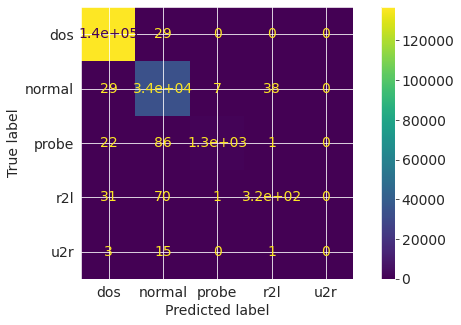

In [64]:
matrix = confusion_matrix(ytest, ytest_predict, labels = model1.classes_)
matrixDisplay = ConfusionMatrixDisplay(matrix, display_labels= model1.classes_)
matrixDisplay.plot()

In [65]:
# Saving the model
model1.model.save('model1.h5')

model_json = model1.model.to_json()

with open('model.json', 'w') as f:
  f.write(model_json)

In [66]:
jovian.commit(project = project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lakshaygola/lstm-anomaly-detection


'https://jovian.ai/lakshaygola/lstm-anomaly-detection'